In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")
%matplotlib inline

In [44]:
data = pd.read_csv(
    "rig_counts.csv",
    index_col="Date",
    parse_dates=True,
)
data.head()

,Henry,WTI,Oil,Gas,Misc,Directional,Horizontal,Vertical,Total Rigs
Date,,,,,,,,,
1997-01-10,3.79,25.42,346,477,2,173,60,592,825
1997-01-17,4.19,24.40,335,482,1,169,69,580,818
1997-01-24,2.98,24.24,333,481,1,171,62,582,815
1997-01-31,2.91,23.49,333,481,1,164,62,581,807
1997-02-07,2.53,22.21,350,481,2,165,68,600,833


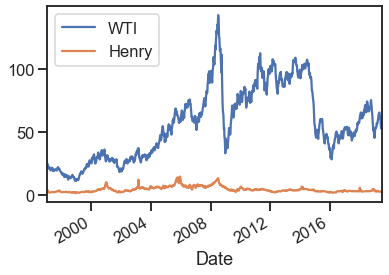

In [45]:
data[['WTI', 'Henry']].plot()

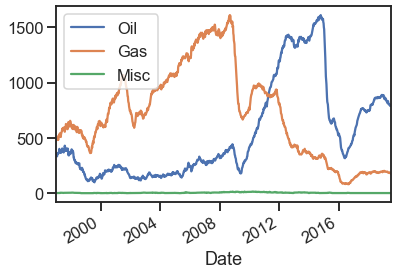

In [46]:
data[['Oil', 'Gas', 'Misc']].plot()

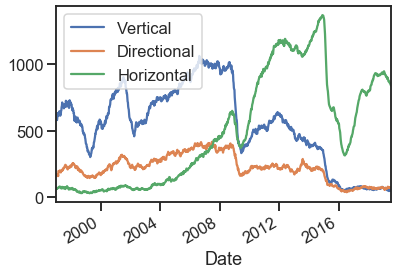

In [47]:
data[['Vertical', 'Directional', 'Horizontal']].plot()

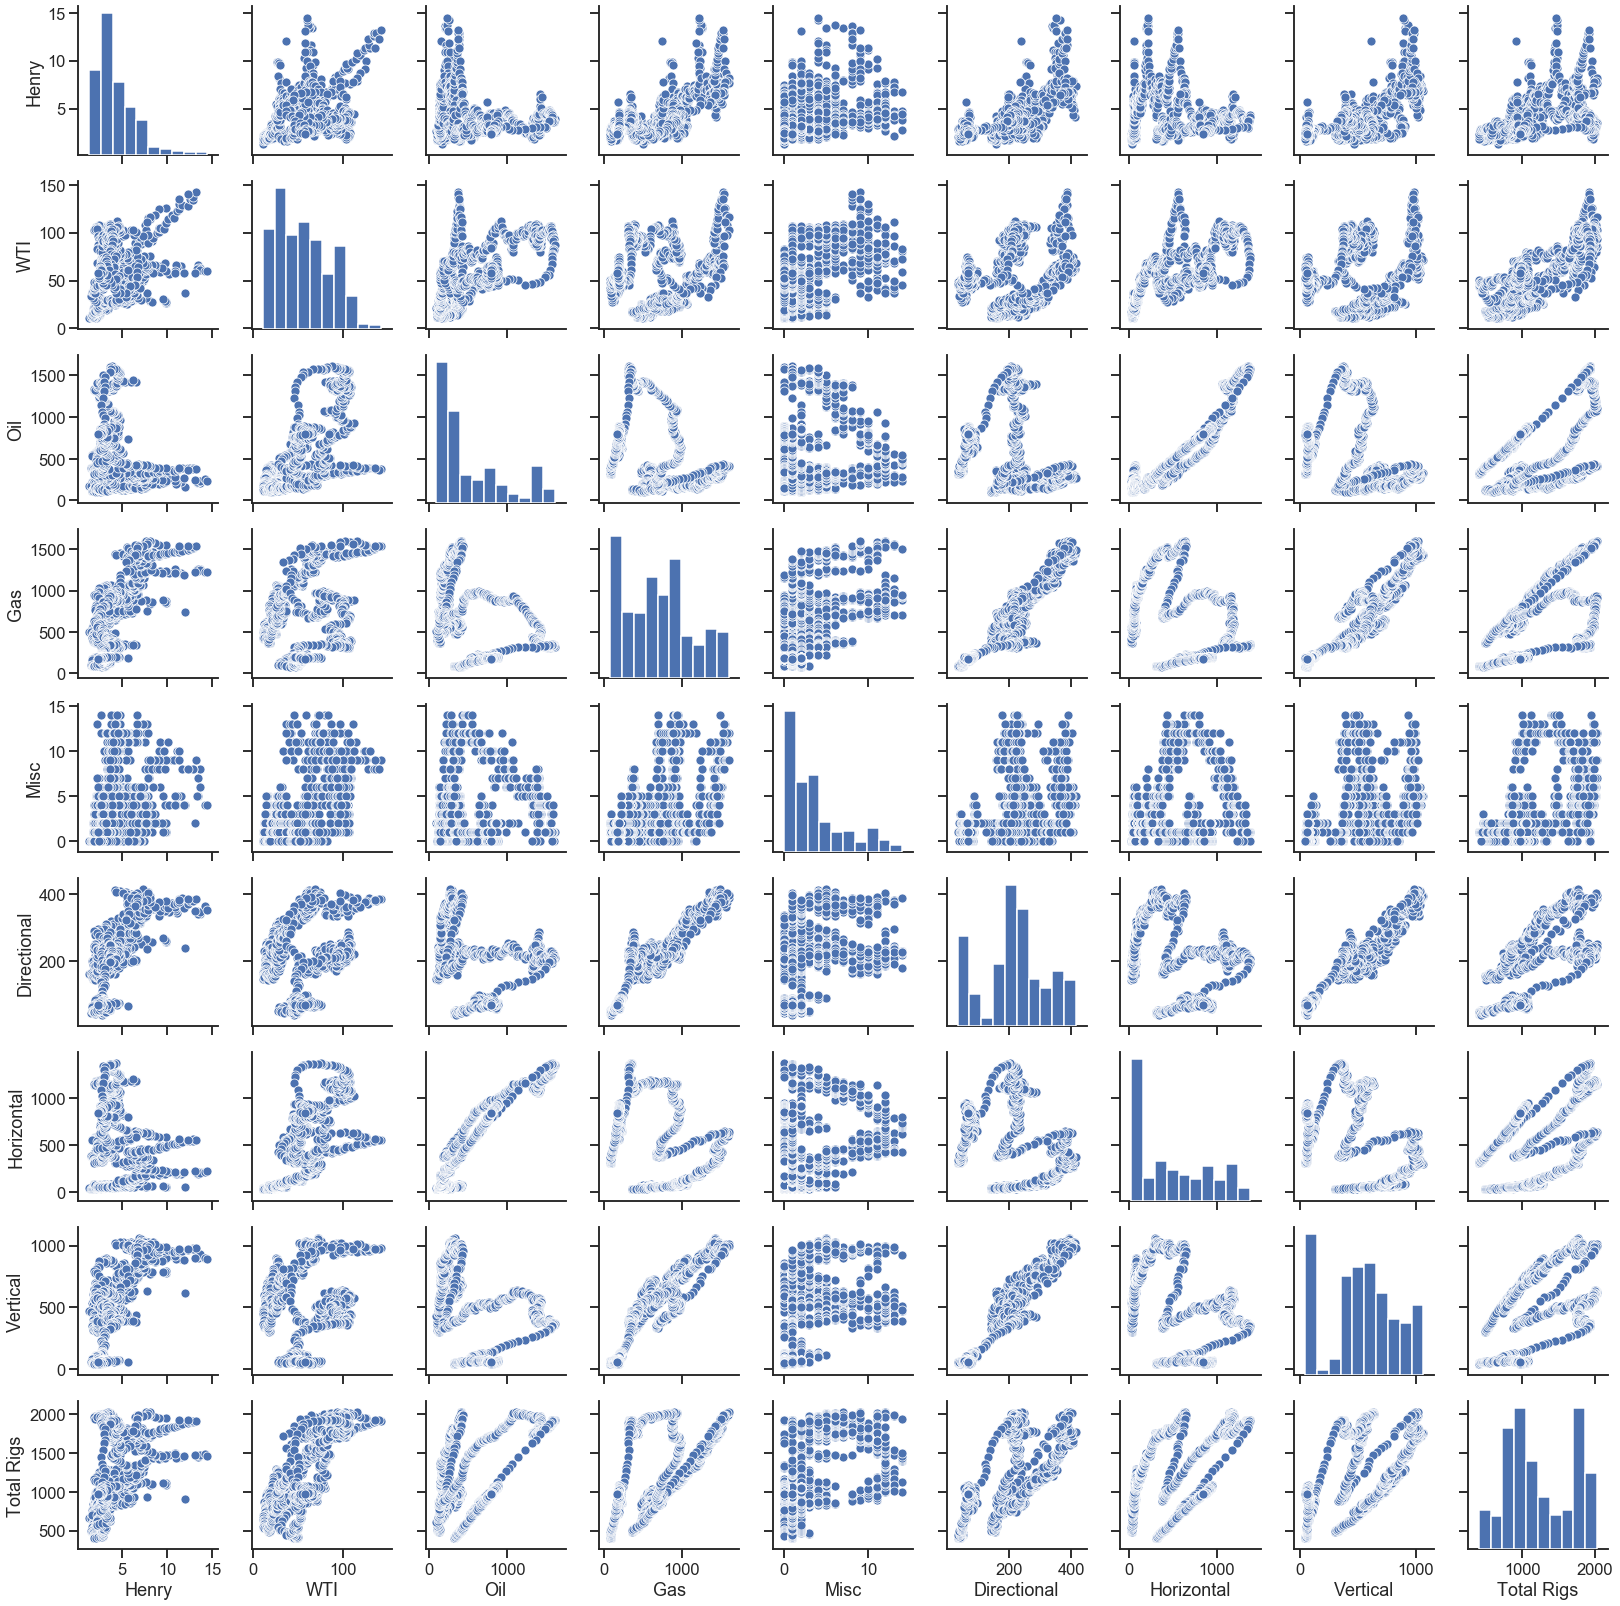

In [48]:
sns.pairplot(data.dropna())

                Henry       WTI       Oil       Gas      Misc  Directional  \
Henry        1.000000  0.348849 -0.228518  0.735867  0.310396     0.709067   
WTI          0.348849  1.000000  0.667580  0.172372  0.516353     0.192527   
Oil         -0.228518  0.667580  1.000000 -0.440449  0.079109    -0.284728   
Gas          0.735867  0.172372 -0.440449  1.000000  0.458299     0.930072   
Misc         0.310396  0.516353  0.079109  0.458299  1.000000     0.356637   
Directional  0.709067  0.192527 -0.284728  0.930072  0.356637     1.000000   
Horizontal  -0.124503  0.784012  0.937575 -0.323739  0.258076    -0.274576   
Vertical     0.650501  0.047580 -0.396720  0.925438  0.289355     0.960306   
Total Rigs   0.463586  0.802955  0.551646  0.505807  0.507006     0.589626   

             Horizontal  Vertical  Total Rigs  
Henry         -0.124503  0.650501    0.463586  
WTI            0.784012  0.047580    0.802955  
Oil            0.937575 -0.396720    0.551646  
Gas           -0.323739  0.

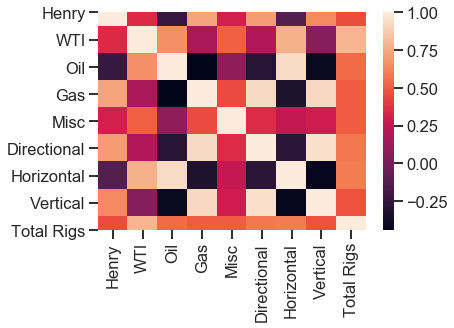

In [49]:
corr = data.corr()
sns.heatmap(
    corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values
)
print(corr)

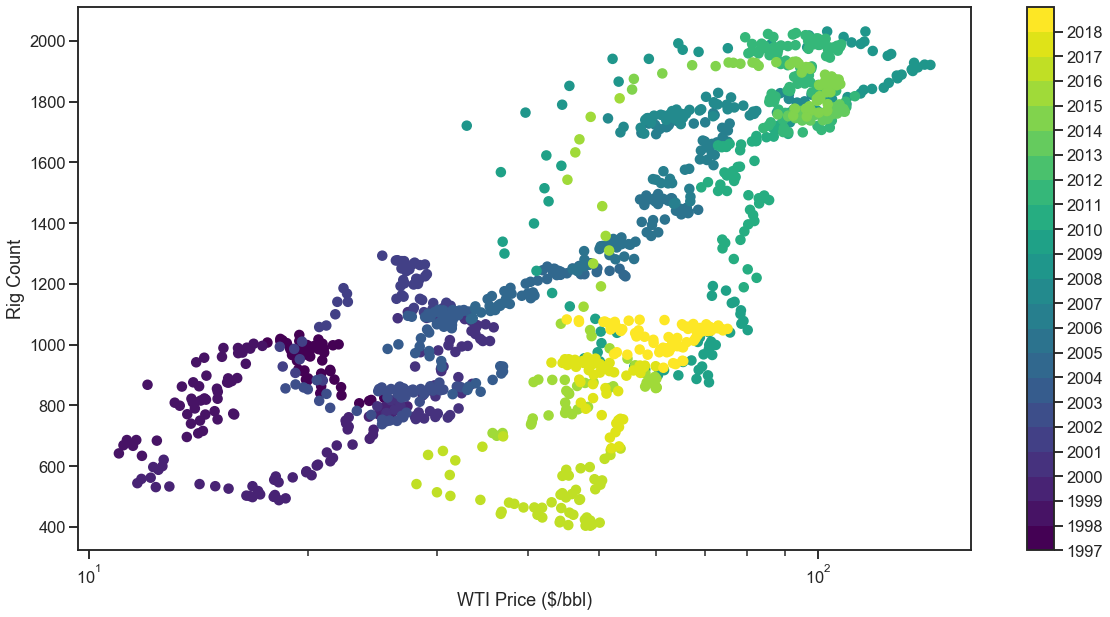

In [75]:
year = data.index.year
cm = plt.cm.get_cmap("viridis", 22)
plt.figure(figsize=(20,10))
fig = plt.scatter(
    data["WTI"],
    data["Total Rigs"],
    c=year,
    cmap=cm, 
)
cb = plt.colorbar(fig, ticks=range(1997,2019))
plt.xlabel("WTI Price ($/bbl)")
plt.ylabel("Rig Count")
plt.xscale("log")

In [76]:
data.dropna().tail()

,Henry,WTI,Oil,Gas,Misc,Directional,Horizontal,Vertical,Total Rigs
Date,,,,,,,,,
2019-05-31,2.66,56.93,800,184,0,70,862,52,984
2019-06-07,2.45,52.97,789,186,0,74,855,46,975
2019-06-14,2.41,52.52,788,181,0,68,852,49,969
2019-06-21,2.40,54.75,789,177,1,68,846,53,967
2019-06-28,2.34,58.38,793,173,1,68,840,59,967


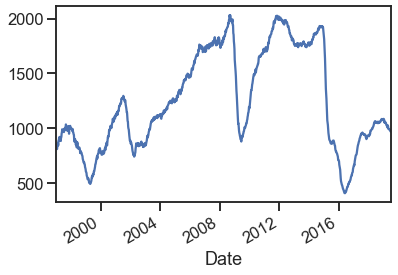

In [77]:
data["Total Rigs"].plot()

In [78]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import glob, warnings, itertools

In [82]:
optimal = []
oparams = []
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [
    (x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))
]

warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                data['Total Rigs'],
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False,
            )

            results = mod.fit()
            oparams.append([param, param_seasonal])
            optimal.append(results.aic)
        except:
            continue


In [79]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [
    (x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))
]

warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                data["Total Rigs"],
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False,
            )

            results = mod.fit()

            print(
                "ARIMA{}x{}12 - AIC:{}".format(
                    param, param_seasonal, results.aic
                )
            )
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:20169.780874502532
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:18441.053992730634
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:14664.078762349829
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:14019.292566348926
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:14675.980155938083
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:14159.21707738636
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:14153.774994953998
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:14003.660275161206
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:18554.820847285264
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:16862.626816109714
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:13239.440641818594
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:12807.622852416756
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:13261.625063971296
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:12936.750705439013
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:12880.635748873661
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:12912.940820284675
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:10061.24972720318
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:9889.14677045

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9558      0.013     76.057      0.000       0.931       0.980
ma.L1         -0.7761      0.024    -32.346      0.000      -0.823      -0.729
ma.S.L12      -1.0336      0.014    -76.065      0.000      -1.060      -1.007
sigma2       221.0680      8.829     25.038      0.000     203.763     238.373


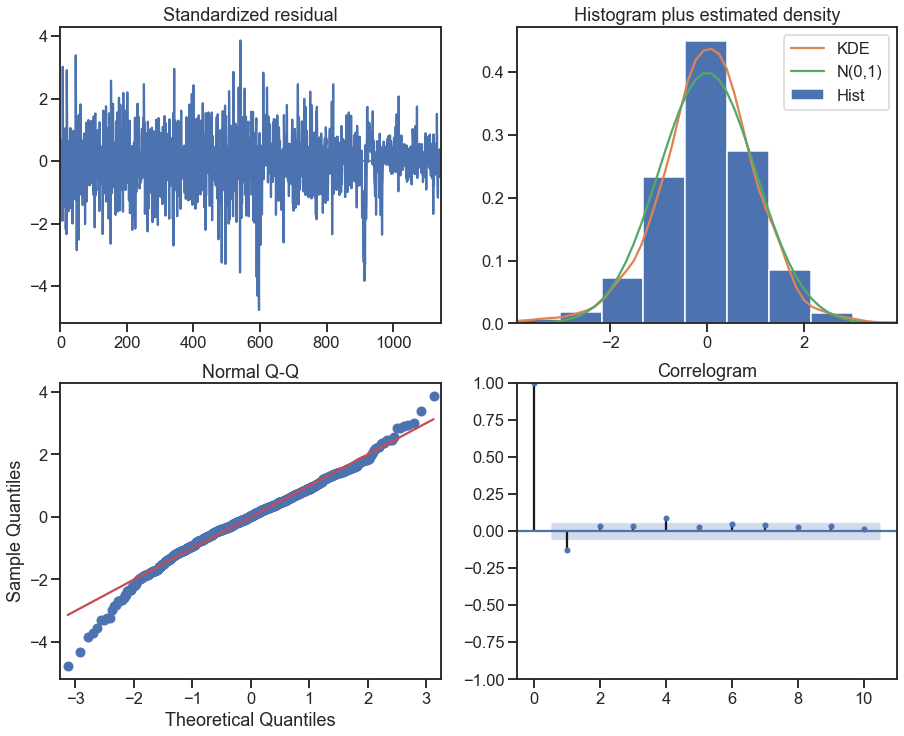

In [83]:
mod = sm.tsa.statespace.SARIMAX(
    data["Total Rigs"],
    order=oparams[np.argmin(optimal)][0],
    seasonal_order=oparams[np.argmin(optimal)][1],
    enforce_stationarity=False,
    enforce_invertibility=False,
)
results = mod.fit()

print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [103]:
forecast_start = "2019-01-04"
forecast_end = "2019-06-28"
pred = results.get_prediction(start=forecast_start, end=forecast_end)
pred_ci = pred.conf_int()

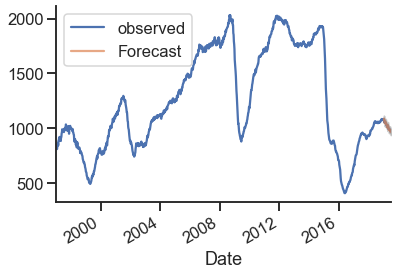

In [105]:
ax = data["Total Rigs"].plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="Forecast", alpha=0.7)
ax.fill_between(
    pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color="k", alpha=0.2
)
plt.legend()
sns.despine()

In [114]:
from sklearn import metrics

y_forecasted = np.ceil(pred.predicted_mean[forecast_start:forecast_end])
y_truth = data["Total Rigs"].loc[forecast_start:]
# Compute mean absolute error
metrics.mean_absolute_error(y_truth, y_forecasted)

7.230769230769231